# Configure font

In [1]:
# Configure Arial as the default font in all figures

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


arial_font_path = '/PATH/TO/ARIAL/FONT/arial.ttf'

fm.fontManager.addfont(arial_font_path)

plt.rcParams['font.family'] = 'Arial'

# Path to Zenodo files folder

In [1]:
path = 'PATH/TO/ZENODO/FILES/FOLDER'

# Figure S1

## Panel A

### Load the data

In [3]:
# Define WT sequences

proteins = {'P0A9X9': 'CspA',
            'P01053': 'CI-2A',
            'P06241': 'FYN-SH3'}

P0A9X9 = 'ATGACTGGTATTGTCAAATGGTTTAATGCAGATAAAGGTTTTGGTTTTATCACTCCAGATGATGGTTCTAAAGATGTCTTTGTCCATTTTTCTGCAATTCAAAATGATGGTTATAAATCTTTGGATGAAGGTCAAAAAGTCTCTTTCACTATTGAATCTGGTGCAAAAGGTCCAGCAGCAGGTAATGTCACTTCT'
P01053 = 'AAAACTGAATGGCCAGAATTGGTTGGTAAATCTGTCGAAGAAGCAAAAAAAGTTATCTTGCAAGATAAACCAGAAGCACAAATCATTGTTTTGCCAGTTGGTACTATTGTTACTATGGAATATAGAATTGATAGAGTCAGATTGTTTGTCGATAAATTGGATAATATCGCACAAGTTCCAAGAGTTGGT'
P06241 = 'ACGCTTTTCGTTGCATTGTATGATTATGAAGCAAGAACTGAAGATGATTTGTCTTTCCATAAAGGTGAAAAATTCCAAATCTTGAATTCTTCTGAAGGTGATTGGTGGGAAGCAAGATCTTTGACTACTGGTGAAACTGGTTATATCCCATCTAACTATGTCGCGCCTGTG'

prots=[P0A9X9,P01053,P06241]


In [4]:
# Load data

import pandas as pd

allvariants = pd.read_csv(path+"Fig2/Sparse_DTS_Cores_fitness_replicates.txt",
                         sep='\t', lineterminator='\n', low_memory = False)

allvariants = allvariants.sort_values('fitness', ascending = False)

# De-multiplex each protein's variants

ID_dict =  {'MT' : 'P0A9X9',
           'KT' : 'P01053',
           'TL' : 'P06241'}

allvariants["Protein"] = pd.Series(dtype="object") 
for index, row in allvariants.iterrows():
    try:
        allvariants.at[index,'Protein']=ID_dict[row.aa_seq[:2]]
    except KeyError:
        continue

allvariants = allvariants.loc[allvariants['Protein'].notnull()].copy()
allvariants

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,count_e1_s0,...,sigma2_uncorr,fitness,sigma,growthrate1,growthrate1_sigma,growthrate2,growthrate2_sigma,growthrate,growthrate_sigma,Protein
9873,NaN,TLMVALYDYEARTEDDLSLHKGEKLQVLNSSEGDWWEARSLTTGET...,NaN,NaN,NaN,NaN,True,False,False,50,...,0.149981,0.119072,0.141862,0.239689,0.030180,0.226946,0.009375,0.232834,0.009311,P06241
2746,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,2.0,NaN,NaN,False,False,False,270,...,0.143105,0.038189,0.118645,0.229667,0.014652,0.222635,0.008945,0.227526,0.007787,P01053
9771,NaN,TLMVALYDYEARTEDDLSFHKGEKLQILNSSEGDWWEARSLTTGET...,NaN,NaN,NaN,NaN,True,False,False,36,...,0.164073,0.010316,0.156208,0.220078,0.035262,0.221325,0.010256,0.225696,0.010252,P06241
0,NaN,KTEWPELVGKSIEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,3.0,NaN,NaN,False,False,False,103,...,0.151908,0.006908,0.136781,0.213351,0.021711,0.223492,0.009495,0.225473,0.008977,P01053
2869,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQFIVLPVGTIVTMEYRIDRI...,NaN,0.0,NaN,True,False,False,False,869,...,0.140544,0.004089,0.102184,0.225144,0.010277,0.222607,0.008785,0.225288,0.006706,P01053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10635,NaN,TLVVALYDYEARTEDDVSFHKGEKMQMLNSSEGDWWEARSLTTGET...,NaN,NaN,NaN,NaN,True,False,False,141,...,0.496796,-4.493979,0.417133,-0.080343,0.053032,-0.061804,0.031054,-0.069925,0.027377,P06241
6480,NaN,TLIVALYDYEARTEDDISIHKGEKVQLLNSSEGDWWEARSLTTGET...,NaN,NaN,NaN,NaN,True,False,False,92,...,0.687984,-4.499378,0.518747,-0.066789,0.054532,-0.072341,0.043004,-0.070280,0.034046,P06241
17285,NaN,MTGIIKWFNADKGFGFLTPDDGSKDVFIHFSAIQNDGYKSLDEGQK...,NaN,NaN,NaN,NaN,True,False,False,66,...,0.688287,-4.586210,0.688287,NaN,NaN,-0.066794,0.043023,-0.075979,0.045173,P0A9X9
14007,NaN,TLFVALYDYEARTEDDVSVHKGEKLQFLNSSEGDWWEARSLTTGET...,NaN,NaN,NaN,NaN,True,False,False,73,...,0.688254,-4.595361,0.688254,NaN,NaN,-0.067366,0.043021,-0.076579,0.045171,P06241


In [5]:
# Find core sequences

cores = {'P0A9X9' : [4,16,25,27,46,48,62],
        'P01053' : [11,18,27,45,47,49,55],
        'P06241' : [2,16,18,24,26,48,53]}

allvariants["core"] = pd.Series(dtype="object") 
for index, row in allvariants.iterrows():
    core=[]
    for i in cores[row.Protein]:
        core.append(row.aa_seq[i])
    allvariants.at[index,'core'] = ''.join(core)

In [6]:
# Define WT cores

from Bio.Seq import Seq

wt_cores = {}
for (prot_seq, prot_nam) in zip(prots, proteins.keys()):
    aa_seq=str(Seq(prot_seq).translate())
    wt_core=[]
    for i in cores[prot_nam]:
        wt_core.append(aa_seq[i])
    wt_cores[prot_nam]= ''.join(wt_core)
wt_cores

{'P0A9X9': 'VIVVVFV', 'P01053': 'VIIVLVI', 'P06241': 'FLFFIIV'}

In [7]:
# Find Hamming distance to WT

allvariants["wt_core"] = pd.Series(dtype="object") 
for index, row in allvariants.iterrows():
    wt = wt_cores[row.Protein]
    allvariants.at[index, 'wt_core']=wt
    if row.core == wt:
        allvariants.at[index, 'Nham_aa'] = 0
    else:
        allvariants.at[index, 'Nham_aa'] = sum(1 for a,b in zip(wt, row.core) if a!=b)
allvariants

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,count_e1_s0,...,sigma,growthrate1,growthrate1_sigma,growthrate2,growthrate2_sigma,growthrate,growthrate_sigma,Protein,core,wt_core
9873,NaN,TLMVALYDYEARTEDDLSLHKGEKLQVLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,50,...,0.141862,0.239689,0.030180,0.226946,0.009375,0.232834,0.009311,P06241,MLLLVVL,FLFFIIV
2746,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,3.0,NaN,NaN,False,False,False,270,...,0.118645,0.229667,0.014652,0.222635,0.008945,0.227526,0.007787,P01053,VIIIVVV,VIIVLVI
9771,NaN,TLMVALYDYEARTEDDLSFHKGEKLQILNSSEGDWWEARSLTTGET...,NaN,4.0,NaN,NaN,True,False,False,36,...,0.156208,0.220078,0.035262,0.221325,0.010256,0.225696,0.010252,P06241,MLFLIVI,FLFFIIV
0,NaN,KTEWPELVGKSIEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,4.0,NaN,NaN,False,False,False,103,...,0.136781,0.213351,0.021711,0.223492,0.009495,0.225473,0.008977,P01053,IIIIVVV,VIIVLVI
2869,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQFIVLPVGTIVTMEYRIDRI...,NaN,4.0,NaN,True,False,False,False,869,...,0.102184,0.225144,0.010277,0.222607,0.008785,0.225288,0.006706,P01053,VIFIIVV,VIIVLVI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10635,NaN,TLVVALYDYEARTEDDVSFHKGEKMQMLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,141,...,0.417133,-0.080343,0.053032,-0.061804,0.031054,-0.069925,0.027377,P06241,VVFMMML,FLFFIIV
6480,NaN,TLIVALYDYEARTEDDISIHKGEKVQLLNSSEGDWWEARSLTTGET...,NaN,7.0,NaN,NaN,True,False,False,92,...,0.518747,-0.066789,0.054532,-0.072341,0.043004,-0.070280,0.034046,P06241,IIIVLVL,FLFFIIV
17285,NaN,MTGIIKWFNADKGFGFLTPDDGSKDVFIHFSAIQNDGYKSLDEGQK...,NaN,5.0,NaN,NaN,True,False,False,66,...,0.688287,NaN,NaN,-0.066794,0.043023,-0.075979,0.045173,P0A9X9,ILVILFF,VIVVVFV
14007,NaN,TLFVALYDYEARTEDDVSVHKGEKLQFLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,73,...,0.688254,NaN,NaN,-0.067366,0.043021,-0.076579,0.045171,P06241,FVVLFMM,FLFFIIV


### Biological replicate correlations

In [8]:
from scipy.stats import pearsonr
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
from seaborn import kdeplot
import pandas as pd

def reg_coef(x,y):
    return pearsonr(x,y, nan_policy='omit')[0]

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * 
            (bounds['desired']['upper'] - bounds['desired']['lower']) / 
            (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

biol_repl_correl = pd.DataFrame(columns=['bio_rep_correl_pearsonr'])
allvariants_scaled = pd.DataFrame()
for protein in ['P06241', 'P01053', 'P0A9X9']:
    protein_variants = allvariants.loc[allvariants['Protein'] == protein].copy()

    # Normalize data in the -1 to 0 range
    reference = allvariants.loc[allvariants['Protein'] == protein].sort_values(
        ['Nham_aa', 'fitness'], ascending=[True, False]).iloc[0]['core']
    fig = plt.figure(figsize=(0, 0))
    lines = kdeplot(data=protein_variants, x='fitness', linewidth=0).get_lines()
    for line in lines:
        x, y = line.get_data()
        mode = (x[np.argmax(y)])
    plt.close()

    protein_variants_scaled = protein_variants.copy()
    protein_variants_scaled['fitness'] = normalize(
        list(protein_variants_scaled['fitness']),
        {'actual': {'lower': mode, 
                    'upper': protein_variants_scaled.loc[protein_variants_scaled['core'] == reference]['fitness'].iloc[0]}, 
         'desired': {'lower': -1, 'upper': 0}})
    protein_variants_scaled['fitness1_uncorr'] = normalize(
        list(protein_variants_scaled['fitness1_uncorr']),
        {'actual': {'lower': mode, 
                    'upper': protein_variants_scaled.loc[protein_variants_scaled['core'] == reference]['fitness1_uncorr'].iloc[0]}, 
         'desired': {'lower': -1, 'upper': 0}})
    protein_variants_scaled['fitness2_uncorr'] = normalize(
        list(protein_variants_scaled['fitness2_uncorr']),
        {'actual': {'lower': mode, 
                    'upper': protein_variants_scaled.loc[protein_variants_scaled['core'] == reference]['fitness2_uncorr'].iloc[0]}, 
         'desired': {'lower': -1, 'upper': 0}})

    allvariants_scaled = pd.concat([allvariants_scaled,protein_variants_scaled], axis=0)
    x = protein_variants_scaled['fitness1_uncorr']
    y = protein_variants_scaled['fitness2_uncorr']
    
    # drop non-finite pairs
    xy = pd.concat([x, y], axis=1).replace([np.inf, -np.inf], np.nan).dropna()
    
    r = pearsonr(xy.iloc[:, 0], xy.iloc[:, 1])[0]
    
    biol_repl_correl.at[protein, 'bio_rep_correl_pearsonr'] = r

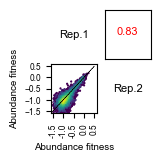

In [9]:
from scipy.stats import pearsonr
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
from seaborn import kdeplot
plt.rcParams['font.family'] = 'Arial'

warnings.filterwarnings('ignore')

def reg_coef(x,y,label=None,color=None,hue=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('{:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center', size = 8, color='red')
    ax.tick_params(right=False, top=False, left=False, bottom=False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    #ax.tick_params(axis='both', which='major', labelsize=14)

def replicate(x,**kwargs):
    ax = plt.gca()
    ax.text(.5,.5,'Rep.'+x.name[7:8],size=8,ha='center',va='center', transform=ax.transAxes)
    ax.set_axis_off()
    
def hexbin(x, y, color, **kwargs): #https://stackoverflow.com/questions/40495093/hexbin-plot-in-pairgrid-with-seaborn
    ax = plt.gca()
    cmap = sns.color_palette('viridis', as_cmap=True)
    ax.hexbin(x, y, bins='log',gridsize=50, cmap=cmap, extent=[min(x), max(x), min(y), max(y)], **kwargs, rasterized=True)
    #lims = np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])
    lims=(-2,0.5,-2,0.5)
    plt.plot(lims, lims, '--', color='k', linewidth=0.3)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.set_ylim(-1.6,0.6)
    ax.set_xlim(-1.6,0.6)
    ax.set_xticks(np.arange(-1.5,1,0.5),labels=np.arange(-1.5,1,0.5),rotation=90)
    ax.set_yticks(np.arange(-1.5,1,0.5))
    ax.tick_params(axis='both', which='major', labelsize=6)

g = sns.PairGrid(allvariants_scaled[['fitness1_uncorr', 'fitness2_uncorr', 'Protein']].dropna())
g.map_upper(reg_coef, hue=None)
g.map_diag(replicate)
g.map_lower(hexbin)
g.fig.set_size_inches(1.2,1.2)

for i in range(2):
    g.axes[i, i].set_visible(False)

for ax in g.axes.flatten():
    if ax.get_xlabel() != '':
        if str(ax.get_xlabel().split('_')[0][-1]) == '1':
            ax.set_xlabel('Abundance fitness', fontsize=7)
    if ax.get_ylabel() != '':
        if str(ax.get_ylabel().split('_')[0][-1]) == '1' or str(ax.get_ylabel().split('_')[0][-1]) == '3':
            ax.set_ylabel('')
        else:
            ax.set_ylabel('Abundance fitness', fontsize=7)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('DTS_core_mutagenesis_pooled_selection_biol_rep_correl.svg', dpi=300, transparent=True, bbox_inches='tight')

## Panel B

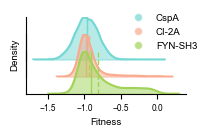

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from matplotlib.lines import Line2D

custom_order = ['P0A9X9', 'P01053', 'P06241']
colors = ['#73D8D3', '#F9AA8F', '#A1D359']
protein_colors = {'P06241': '#B4D689',
                 'P01053': '#F6DCC9',
                 'P0A9X9': '#B1D9D8'}

fig, axes = plt.subplots(len(custom_order), 1, figsize=(2, 1), sharex=True,
                         gridspec_kw={'hspace': -0.6}, facecolor='none')

for idx, protein in enumerate(custom_order):
    group_data = allvariants_scaled[allvariants_scaled['Protein'] == protein]
    ax = axes[idx]
    
    ax.set_facecolor('none')

    kde = gaussian_kde(group_data['fitness'])
    x_vals = np.linspace(group_data['fitness'].min() - 0.1, group_data['fitness'].max() + 0.1, 200)
    y_vals = kde(x_vals)

    ax.fill_between(x_vals, 0, y_vals, color=colors[idx], alpha=0.5)
    ax.plot(x_vals, y_vals, color=colors[idx], lw=1.5)

    mean = group_data['fitness'].mean()
    median = group_data['fitness'].median()
    ax.axvline(mean, color=colors[idx], linestyle='--', lw=1)
    ax.axvline(median, color=colors[idx], linestyle='-', lw=1)

    ax.set_ylim(0, max(y_vals)+0.025)

    ax.spines[['top', 'right']].set_visible(False)
    ax.set_yticks([])
    
    if idx != len(custom_order) - 1:
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(axis='x', bottom=False, labelbottom=False)
    else:
        ax.set_xlabel('Fitness', fontsize=7)
        ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True,labelsize=6)
        ax.set_xticks(np.arange(-1.5,0.5,0.5))

fig.text(0.02, 0.5, 'Density', va='center', rotation='vertical', fontsize=7, fontweight='bold')

fig.subplots_adjust(left=0.1)

protein_name_map = {
    'P0A9X9': 'CspA',
    'P01053': 'CI-2A',
    'P06241': 'FYN-SH3'
}

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[idx], 
                  markersize=6, alpha=0.7, label=protein_name_map[protein]) 
           for idx, protein in enumerate(custom_order)]

fig.legend(handles=handles, loc='upper right', bbox_to_anchor=(1, 1), 
           ncol=1, fontsize=7, frameon=False)


plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('DTS_core_mutagenesis_1D_fitness_distri_mean_median.svg', dpi=300, transparent=True, bbox_inches='tight')


## Panel C

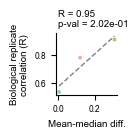

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

mean_median=allvariants.groupby('Protein')['fitness'].apply(lambda x: np.mean(x) - np.median(x)).to_frame()
merge = pd.merge(mean_median,biol_repl_correl, left_index=True,right_index=True)

merge = merge.sort_values('fitness')

protein_colors = {'P06241': '#A1D359',
                 'P01053': '#F9AA8F',
                 'P0A9X9': '#73D8D3'}

g = sns.FacetGrid(data=merge, aspect=2)
g.map(plt.scatter, 'fitness', 'bio_rep_correl_pearsonr', s=3, 
      color=[protein_colors[idx] for idx in merge.index])  # Assign custom colors
#g.add_legend(bbox_to_anchor=(1.3,0.7), title='', fontsize=6)
g.fig.set_size_inches(0.7, 0.8)
g.tick_params(axis='both', which='major', labelsize=6)

x = merge[['fitness']].to_numpy()
y = merge[['bio_rep_correl_pearsonr']].to_numpy()

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y, y_pred)
r, p = pearsonr(y.ravel(), y_pred.ravel())

plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
plt.xlabel('Mean-median diff.', fontsize=7)
plt.ylabel('Biological replicate\ncorrelation (R)', fontsize=7)
plt.annotate('R = '+str(round(r, 2))+'\np-val = '+'{:0.2e}'.format(p),
             fontsize=7, annotation_clip=False, xy=(0, 1))

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('DTS_coreome_bio_rep_correl_vs_mean-median_diff.svg', dpi=300, transparent=True)


## Panel D

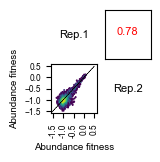

In [12]:
from scipy.stats import pearsonr
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
from seaborn import kdeplot
plt.rcParams['font.family'] = 'Arial'

warnings.filterwarnings('ignore')

def reg_coef(x,y,label=None,color=None,hue=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('{:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center', size = 8, color='red')
    ax.tick_params(right=False, top=False, left=False, bottom=False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    #ax.tick_params(axis='both', which='major', labelsize=14)

def replicate(x,**kwargs):
    ax = plt.gca()
    ax.text(.5,.5,'Rep.'+x.name[7:8],size=8,ha='center',va='center', transform=ax.transAxes)
    ax.set_axis_off()
    
def hexbin(x, y, color, **kwargs): #https://stackoverflow.com/questions/40495093/hexbin-plot-in-pairgrid-with-seaborn
    ax = plt.gca()
    cmap = sns.color_palette('viridis', as_cmap=True)
    ax.hexbin(x, y, bins='log',gridsize=50, cmap=cmap, extent=[min(x), max(x), min(y), max(y)], **kwargs, rasterized=True)
    #lims = np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])
    lims=(-2,0.5,-2,0.5)
    plt.plot(lims, lims, '--', color='k', linewidth=0.3)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.set_ylim(-1.6,0.6)
    ax.set_xlim(-1.6,0.6)
    ax.set_xticks(np.arange(-1.5,1,0.5),labels=np.arange(-1.5,1,0.5),rotation=90)
    ax.set_yticks(np.arange(-1.5,1,0.5))
    ax.tick_params(axis='both', which='major', labelsize=6)

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

for protein in ['P01053']:
    
    protein_variants = allvariants.loc[allvariants['Protein']==protein].copy()

    # Normalize data in the -1 to 0 range
    reference=allvariants.loc[allvariants['Protein']==protein].sort_values(['Nham_aa','fitness'], ascending=[True,False]).iloc[0]['core']
    fig = plt.figure(figsize=(0,0))
    lines = kdeplot(data=protein_variants,x='fitness',linewidth=0).get_lines()
    for line in lines:
        x, y = line.get_data()
        mode=(x[np.argmax(y)])
    plt.close()
        
    protein_variants_scaled = protein_variants.copy()    
    
    protein_variants_scaled['fitness']=normalize(list(protein_variants_scaled['fitness']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    protein_variants_scaled['fitness1_uncorr']=normalize(list(protein_variants_scaled['fitness1_uncorr']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness1_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    protein_variants_scaled['fitness2_uncorr']=normalize(list(protein_variants_scaled['fitness2_uncorr']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness2_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    
    g = sns.PairGrid(protein_variants_scaled[['fitness1_uncorr', 'fitness2_uncorr', 'Protein']].dropna())
    g.map_upper(reg_coef, hue=None)
    g.map_diag(replicate)
    g.map_lower(hexbin)
    g.fig.set_size_inches(1.2,1.2)
    
    for i in range(2):
        g.axes[i, i].set_visible(False)
    
    for ax in g.axes.flatten():
        if ax.get_xlabel() != '':
            if str(ax.get_xlabel().split('_')[0][-1]) == '1':
                ax.set_xlabel('Abundance fitness', fontsize=7)
        if ax.get_ylabel() != '':
            if str(ax.get_ylabel().split('_')[0][-1]) == '1' or str(ax.get_ylabel().split('_')[0][-1]) == '3':
                ax.set_ylabel('')
            else:
                ax.set_ylabel('Abundance fitness', fontsize=7)
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig(protein+'_biol_rep_correl.svg', dpi=300, transparent=True, bbox_inches='tight')

## Panel E

### Fitness landscapes

In [13]:
import numpy as np
import matplotlib.colors as mcolors

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1, name=None):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
      name : Optional name for the colormap. If provided, the colormap
          will be registered under this name.

    Returns
    -------
      A `LinearSegmentedColormap` object.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # Regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # Shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = mcolors.LinearSegmentedColormap(name if name else "shifted", cdict)

    return newcmap
iterator_cmap=0

In [14]:
# Define all variants separated by 1 mutation

from tqdm import tqdm
from itertools import product

DTS = ['F','L','I','M','V']
a=list(product(DTS,repeat=7))



dod={}
for variant in tqdm(a, total=len(a)):
    iterator=0
    positerator=0
    singles=[]
    for i in product(variant,DTS):
        mutant = ''.join(''.join(variant[:positerator])+str(i[1])+''.join(variant[positerator+1:]))
        if (iterator/5).is_integer() == True and iterator !=0:
            positerator+=1
        iterator+=1
        if mutant != ''.join(variant):
            singles.append(mutant)
    dod[''.join(variant)]=singles


100%|██████████| 78125/78125 [00:01<00:00, 39365.98it/s]


#### P01053 - CI-2A

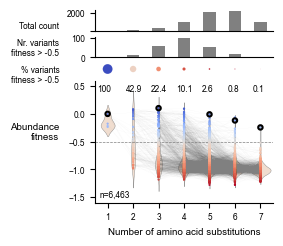

In [15]:
import seaborn as sns
import networkx as nx
from itertools import count
from seaborn import kdeplot
from itertools import groupby
import matplotlib
import numpy as np

validated_variants = {'P06241': ['FLFFVIV', 'MLFFIVL', 'MFFFVIL', 'MMFLIVF', 'LMFMLVF', 'LMVLLVL'],
                     'P01053': ['VIVVLVI', 'VIIIVVV', 'IIVIVVV', 'LMFIVVV', 'ILVIVIV'],
                     'P0A9X9': []}

protein_colors = {'P06241': '#B4D689',
                 'P01053': '#F6DCC9',
                 'P0A9X9': '#B1D9D8'}

total_core_viabilities = pd.DataFrame(columns=['protein', 'variants_above_01', 'variants_above_025', 'variants_above_05', 'variants_below_05'])
fraction_core_viabilities = pd.DataFrame(columns=['protein', 'variants_above_01', 'variants_above_025', 'variants_above_05', 'variants_below_05'])
for protein in ['P01053']:
    
    protein_variants = allvariants.loc[allvariants['Protein']==protein].copy()

    # Normalize data in the -1 to 0 range
    reference=allvariants.loc[allvariants['Protein']==protein].sort_values(['Nham_aa','fitness'], ascending=[True,False]).iloc[0]['core']
    
    fig,ax = plt.subplots(figsize=(0,0))
    lines = kdeplot(data=protein_variants,x='fitness',linewidth=0).get_lines()
    for line in lines:
        x, y = line.get_data()
        mode=(x[np.argmax(y)])
        ax.axvline(x[np.argmax(y)], ls='--')
    plt.close()
        
    protein_variants_scaled = protein_variants.copy()    
    
    protein_variants_scaled['fitness']=normalize(list(protein_variants_scaled['fitness']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    protein_variants_scaled['fitness1_uncorr']=normalize(list(protein_variants_scaled['fitness1_uncorr']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness1_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    protein_variants_scaled['fitness2_uncorr']=normalize(list(protein_variants_scaled['fitness2_uncorr']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness2_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})

    lowest_nham = int(protein_variants_scaled.loc[protein_variants_scaled['core']==reference].iloc[0]['Nham_aa'])

    lines = kdeplot(data=protein_variants_scaled, x='fitness', ax=ax).get_lines()
        
    for line in lines:
        x, y = line.get_data()
        mode=x[np.argmax(y)]
    
    G = nx.from_dict_of_lists(dod)
    G_val = nx.from_dict_of_lists(dod)
    
    pos={}
    for index, row in protein_variants_scaled.iterrows():
        pos[row.core] = (row.Nham_aa-lowest_nham, row.fitness)
        
    validated = validated_variants[protein]
    pos_val={}
    for index, row in protein_variants_scaled[protein_variants_scaled['core'].isin(validated)].iterrows():
        pos_val[row.core] = (row.Nham_aa-lowest_nham, row.fitness)

    fig, (ax0,axviable,ax1,ax2) = plt.subplots(4,1,gridspec_kw={'height_ratios':[2,2,1,12],'hspace': 0.15},figsize=(2.3,2.5))
    plt.close()
    fig, (ax0,axviable,ax1,ax2) = plt.subplots(4,1,gridspec_kw={'height_ratios':[2,2,1,12],'hspace': 0.15},figsize=(2.3,2.5),sharex=ax1)
    
    
    fig=sns.violinplot(x="Nham_aa", y="fitness", data=protein_variants_scaled, inner=None, ax=ax2, color=protein_colors[protein], linewidth=0.3)
    plt.axhline(y=-0.5, linestyle='--', color='gray', linewidth=0.5)
    
    remove=[i for i in dod.keys() if i not in pos.keys()]
    remove_val=[i for i in dod.keys() if i not in pos_val.keys()]
    
    G.remove_nodes_from(remove)
    G_val.remove_nodes_from(remove_val)
    
    fitness_values=[]
    for i in pos:
        fitness_values.append(pos[i][1])
    groups = []
    for _, g in groupby(fitness_values, lambda x: (x-1)//0.05):
        groups.append(list(g))      # Store group iterator as a list
    
    fitness_attr={}
    for node in G.nodes:
        iterator=0
        for bin in groups:
            if pos[node][1] in bin:
                fitness_attr[node]=iterator
                break
            iterator+=1
    
    nx.set_node_attributes(G, fitness_attr, 'fitness')
    groups = set(nx.get_node_attributes(G,'fitness').values())
    mapping = dict(zip(sorted(groups),count()))
    nodes = G.nodes()
    colors = [mapping[G.nodes[n]['fitness']] for n in nodes]
    
    total_viable=0
    nham_viability=pd.DataFrame(columns=['Number_of_variants','Fraction_50pc_folded'])
    for nham in range(lowest_nham,8,1):
        nham_viability.at[nham,'protein']=protein
        nham_viability.at[nham,'nham']=nham
        nham_viability.at[nham,'Number_of_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])
        nham_viability.at[nham,'Fraction_50pc_folded']=round(100*(len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.5].index)/len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])),1)
        nham_viability.at[nham,'Number_of_50pc_folded_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.5].index)
        nham_viability.at[nham,'Fraction_75pc_folded']=round(100*(len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.25].index)/len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])),1)
        nham_viability.at[nham,'Number_of_75pc_folded_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.25].index)
        nham_viability.at[nham,'Fraction_90pc_folded']=round(100*(len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.1].index)/len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])),1)
        nham_viability.at[nham,'Number_of_90pc_folded_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.1].index)
        total_viable=total_viable+len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.5].index)
    for index, row in nham_viability.iterrows():
        nham_viability.at[index,'Fraction_of_total_50pc_viable_variants']= round(100*row['Number_of_50pc_folded_variants']/total_viable,1)
    
    total_core_viabilities.at[protein,'variants_above_01']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.1].index)/len(protein_variants_scaled.index)*5**7
    total_core_viabilities.at[protein,'variants_above_025']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.25].index)/len(protein_variants_scaled.index)*5**7
    total_core_viabilities.at[protein,'variants_below_05']=5**7-len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.5].index)/len(protein_variants_scaled.index)*5**7
    total_core_viabilities.at[protein,'variants_above_05']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.5].index)/len(protein_variants_scaled.index)*5**7

    fraction_core_viabilities.at[protein,'variants_above_01']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.1].index)/len(protein_variants_scaled.index)
    fraction_core_viabilities.at[protein,'variants_above_025']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.25].index)/len(protein_variants_scaled.index)
    fraction_core_viabilities.at[protein,'variants_below_05']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']<=-0.5].index)/len(protein_variants_scaled.index)
    fraction_core_viabilities.at[protein,'variants_above_05']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.5].index)/len(protein_variants_scaled.index)
        
    orig_cmap = plt.cm.coolwarm
    iterator_cmap+=1
    midpoint=(-0.5 - np.min(protein_variants_scaled['fitness']))/ (np.max(protein_variants_scaled['fitness']) - np.min(protein_variants_scaled['fitness']))
    shifted_cmap = shiftedColorMap(orig_cmap, midpoint=1-midpoint, name='shifted'+str(iterator_cmap))
        
    nx.draw_networkx(G, pos=pos, with_labels=False, node_size=0, ax=ax2, edge_color='gray', width=0.01)
    nodes=nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, node_size=0.3, cmap=shifted_cmap)
    nx.draw_networkx(G_val, pos=pos_val, with_labels=False, node_size=10, ax=ax2, width=0, node_shape=matplotlib.markers.MarkerStyle(marker='o', fillstyle='none'), node_color='k')
    ax2.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax2.set_xlabel('Number of amino acid substitutions', fontsize=7)
    ax2.set_ylabel("Abundance\nfitness", fontsize=7,rotation='horizontal', ha='right')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.tick_params(axis='both', which='major', labelsize=6)
    
    nham_viability['Fraction_50pc_folded'] = pd.to_numeric(nham_viability['Fraction_50pc_folded'], errors='coerce')
    sns.scatterplot(x=[i-lowest_nham for i in nham_viability['nham']],y=[0]*len(nham_viability.index), hue=nham_viability['Fraction_50pc_folded'].astype(float),palette='coolwarm_r', s=nham_viability['Fraction_50pc_folded']*0.5, legend=False,ax=ax1)
    ax1.spines[['top','right','left','bottom']].set_visible(False)
    ax1.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False,top=False, right=False)
    ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    for index, row in nham_viability.iterrows():
        if row.Fraction_50pc_folded == 100.0:
            ax2.annotate(100, (row.nham-lowest_nham-0.4,0.4), fontsize=6, color='black')
        else:
            ax2.annotate(row.Fraction_50pc_folded, (row.nham-lowest_nham-0.3,0.4), fontsize=6, color='black')
    ax1.set_ylabel('% variants\nfitness > -0.5',fontsize=6,rotation='horizontal', ha='right')
            
    ax2.annotate('n='+f"{len(protein_variants_scaled):,}", (-0.3,-1.5), fontsize=6)
    plt.subplots_adjust(hspace=0.05)
    
    nham_viability['Number_of_variants'].plot.bar(ax=ax0,fontsize=6,color='gray')
    ax0.spines[['top','right']].set_visible(False)
    ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax0.set_ylabel('Total count',fontsize=6, rotation='horizontal', ha='right')
    labels = ax0.get_yticklabels()
    labels[0] = ""
    ax0.set_yticklabels(labels)
    
    nham_viability['Number_of_50pc_folded_variants'].plot.bar(ax=axviable,fontsize=6,color='gray')
    axviable.spines[['top','right']].set_visible(False)
    axviable.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    axviable.set_ylabel('Nr. variants\nfitness > -0.5',fontsize=6,rotation='horizontal', ha='right')
    
    ax0.get_yaxis().set_label_coords(-0.2,0)
    axviable.get_yaxis().set_label_coords(-0.2,0)
    ax1.get_yaxis().set_label_coords(-0.2,-1)
    ax2.get_yaxis().set_label_coords(-0.2,0.5)
    plt.ylim(-1.6,0.6)
    plt.xlim(-0.5,7-lowest_nham+0.5)
    plt.rcParams['svg.fonttype'] = 'none'
#    plt.savefig(protein+'_fitness_distri.png', dpi=300, transparent=True, bbox_inches='tight')



## Panel F

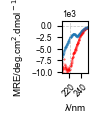

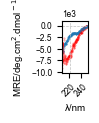

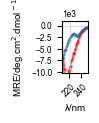

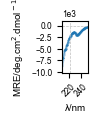

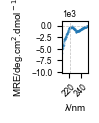

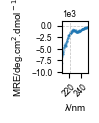

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline
import numpy as np

folded_spectra = ['ICI2_WT_50uM_30C_Smooth_230906-1', 'ICI2_23or1_25uM_30C_Smooth_230906-1', 'ICI2_20or3_50uM_30C_Smooth_230906-1', 'ICI2_5or5_50uM_30C_Smooth_230906-1', 'ICI2_4or6_37uM_30C_Smooth_230906-1', 'ICI2_18or7_25uM_30C_Smooth_230906-1']
unfolded_spectra = ['ICI2_WT_50uM_95C_Draft_230906-1', 'ICI2_23or1_25uM_95C_Draft_230906-1', 'ICI2_20or3_50uM_95C_Draft_230906-1', 'ICI2_5or5_75uM_95C_Draft_230906-1', 'ICI2_4or6_37uM_95C_Draft_230906-1', 'ICI2_18or7_25uM_95C_Draft_230906-1']
aggregated_unfolded_spectra = ['ICI2_5or5_75uM_95C_Draft_230906-1', 'ICI2_4or6_37uM_95C_Draft_230906-1', 'ICI2_18or7_25uM_95C_Draft_230906-1']
names = ['WT VIIVLVI', 'Or1 VIVVLVI', 'Or3 VIIIVVV', 'Or5 IIVIVVV', 'Or6 LMFIVVV', 'Or7 ILVIVIV']
concentrations = [50, 25, 50, 50, 37, 25]

blank_folded = pd.read_csv(path+'FigS1/CD/BLANK_FYN-ICI2_30C_Smooth_230906-1.txt',
                  sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')

blank_folded=blank_folded.sort_values('Wavelength')
blank_folded=blank_folded.set_index('Wavelength')
blank_folded['Wavelength']=blank_folded.index

blank_unfolded = pd.read_csv(path+'FigS1/CD/BLANK_FYN-ICI2_95C_Draft_230906-1.txt',
                  sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')

blank_unfolded=blank_unfolded.sort_values('Wavelength')
blank_unfolded=blank_unfolded.set_index('Wavelength')
blank_unfolded['Wavelength']=blank_unfolded.index

for folded_spectrum, unfolded_spectrum, name, concentration in zip(folded_spectra, unfolded_spectra, names, concentrations):
    
    data = pd.read_csv(path+'FigS1/CD/'+folded_spectrum+'.txt',
                      sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')
    
    data=data.sort_values('Wavelength')
    data=data.set_index('Wavelength')
    data['Wavelength']=data.index
    data=data.loc[200:250]
    
    conc_mM = concentration/1000
    protein_length = 68-1
    path_length_cm = 0.001
    
    for index, row in data.iterrows():
        data.at[index,'MRE']= (row.Ellipticity-blank_folded['Ellipticity'].loc[index])/((conc_mM*protein_length)*path_length_cm)
        
    x=data['Wavelength']
    y=data['MRE']
    y_spl = UnivariateSpline(x,y, s=5000000)
    l = x.iloc[-1]
    x_range = np.linspace(x.iloc[0],x[l-1],1000)
    
    unfolded = pd.read_csv(path+'FigS1/CD/'+unfolded_spectrum+'.txt',
                      sep='\t', header=20, names=['Wavelength', 'Ellipticity', 'HT', 'Abs'], skipfooter=52, engine='python')
    
    unfolded=unfolded.sort_values('Wavelength')
    unfolded=unfolded.set_index('Wavelength')
    unfolded['Wavelength']=unfolded.index
    
    for index, row in unfolded.iterrows():
        unfolded.at[index,'MRE']= (row.Ellipticity-blank_unfolded['Ellipticity'].loc[index])/((conc_mM*protein_length)*path_length_cm)
        
    x_u=unfolded['Wavelength']
    y_u=unfolded['MRE']
    y_spl_u = UnivariateSpline(x_u,y_u, s=100000000)
    
    
    fig, ax = plt.subplots(figsize=(0.33,0.67))
    if unfolded_spectrum not in aggregated_unfolded_spectra:
        plt.plot(x_range, y_spl_u(x_range), '-', color='red', linewidth=0.3)
        unfolded.plot(x='Wavelength', y='MRE', kind='scatter', ax=ax, s=0.2, alpha=0.4, color='red', label='368K')
    plt.plot(x_range, y_spl(x_range), '-', color='#1F77B4', linewidth=0.3)
    data.plot(x='Wavelength', y='MRE', kind='scatter', ax=ax, s=0.2, alpha=0.4, color='#1F77B4', label='303K')
    
    #plt.axvline(235,ls='--',color='#BDBDBD',linewidth=0.5)
    #plt.axvline(230,ls='--',color='#BDBDBD',linewidth=0.5)
    plt.axvline(222,ls='--',color='#BDBDBD',linewidth=0.5)
    plt.axhline(0,ls='--',color='#BDBDBD',linewidth=0.5)
    #plt.title(name)
    
    plt.xlim(210,250)
    plt.ylim(-10100,1000)
    
    plt.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
    ax.yaxis.get_offset_text().set_font('Arial')
    ax.yaxis.get_offset_text().set_fontsize(6)
    plt.xticks(np.arange(220,260,20),fontname='Arial', fontsize=6, rotation=45)
    plt.yticks(np.arange(-10000,1000,2500),fontname='Arial', fontsize=6)
    plt.xlabel('λ/nm',fontname='Arial', fontsize=7)
    plt.ylabel('MRE/deg.cm$^2$.dmol$^-$$^1$',fontname='Arial', fontsize=7)
    
    ax.get_legend().remove()
    
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('CI-2A_CD_'+name+'.svg', dpi=300, transparent=True)


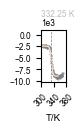

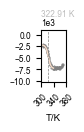

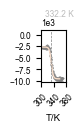

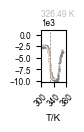

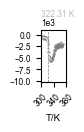

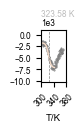

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

Tramps = ['ICI2_WT_Tramp_222nm-1-222nm', 'ICI2_23or1_Tramp_222nm-1-222nm', 'ICI2_20or3_Tramp_222nm-1-222nm', 'ICI2_5or5_Tramp_222nm-1-222nm', 'ICI2_4or6_Tramp_222nm-1-222nm', 'ICI2_18or7_Tramp_222nm-1-222nm']
names = ['WT VIIVLVI', 'Or1 VIVVLVI', 'Or3 VIIIVVV', 'Or5 IIVIVVV', 'Or6 LMFIVVV', 'Or7 ILVIVIV']
concentrations = [50, 25, 50, 50, 37, 25]

blank_Tramp = pd.read_csv(path+'FigS1/CD/BLANK_FYN_ICI2_Tramp_222nm-1-222nm.txt',
                  sep='\t', header=14, names=['Temperature', 'Ellipticity', 'HT'], skipfooter=45, engine='python')


for Tramp, name, concentration in zip(Tramps, names, concentrations):
    
    data = pd.read_csv(path+'FigS1/CD/'+Tramp+'.txt',
                  sep='\t', header=14, names=['Temperature', 'Ellipticity', 'HT'], skipfooter=45, engine='python')
    
    conc_mM = concentration/1000
    protein_length = 68-1
    path_length_cm = 0.001
    
    for index, row in data.iterrows():
        data.at[index,'MRE']= (row.Ellipticity)/((conc_mM*protein_length)*path_length_cm)
        data.at[index,'Temperature']=row.Temperature+273
    
    data=data.set_index('Temperature')
    data['Temperature']=data.index
        
    x=data[:data['MRE'].idxmin()]['Temperature']
    l = x.iloc[-1]
    y=data[:data['MRE'].idxmin()]['MRE']
    def sigmoid(x, L ,x0, k, b): ##https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
        z = L / (1 + np.exp(-k*(x-x0))) + b
        return (z)
    
    p0 = [max(y), np.median(x),0,min(y)] # this is an mandatory initial guess
    
    popt, pcov = curve_fit(sigmoid, x, y,p0, method='lm')
    x_range = np.linspace(x.iloc[0],x[l],1000)
    y_sig = sigmoid(x_range, *popt)
    deriv = np.diff(y_sig)/np.diff(x_range)
    
    fig, ax = plt.subplots(figsize=(0.33,0.67))
    
    data.plot(x='Temperature', y='MRE', kind='scatter', ax=ax, s=0.2, alpha=1, color='gray')
    plt.plot(x_range, y_sig, '-', linewidth=1, color='#F6DCC9')
    plt.axvline(x_range[np.argmin(deriv)],ls='--',color='gray',linewidth=0.5)
    plt.text(1.3, 1.4, str(round(x_range[np.argmin(deriv)], 2))+' K', ha='right', va='top', transform=ax.transAxes, color = '#BDBDBD', font='Arial', fontsize=6)
    
    l = x.iloc[-1]
    plt.xlim(299,373)
    plt.ylim(-10100,1000)
    
    plt.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
    ax.yaxis.get_offset_text().set_font('Arial')
    ax.yaxis.get_offset_text().set_fontsize(6)
    plt.xticks(np.arange(300,400,40),fontname='Arial', fontsize=6, rotation=45)
    plt.yticks(np.arange(-10000,1000,2500),fontname='Arial', fontsize=6)
    plt.xlabel('T/K',fontname='Arial', fontsize=7)
    #plt.ylabel('MRE/deg.cm$^2$.dmol$^-$$^1$',fontname='Arial', fontsize=7)
    plt.ylabel('',fontname='Arial', fontsize=7)
    
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('CI-2A_CD_Tramp_'+name+'.svg', dpi=300, transparent=True)


## Panel G

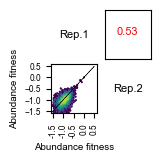

In [18]:
from scipy.stats import pearsonr
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
from seaborn import kdeplot
plt.rcParams['font.family'] = 'Arial'

warnings.filterwarnings('ignore')

def reg_coef(x,y,label=None,color=None,hue=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('{:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center', size = 8, color='red')
    ax.tick_params(right=False, top=False, left=False, bottom=False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    #ax.tick_params(axis='both', which='major', labelsize=14)

def replicate(x,**kwargs):
    ax = plt.gca()
    ax.text(.5,.5,'Rep.'+x.name[7:8],size=8,ha='center',va='center', transform=ax.transAxes)
    ax.set_axis_off()
    
def hexbin(x, y, color, **kwargs): #https://stackoverflow.com/questions/40495093/hexbin-plot-in-pairgrid-with-seaborn
    ax = plt.gca()
    cmap = sns.color_palette('viridis', as_cmap=True)
    ax.hexbin(x, y, bins='log',gridsize=50, cmap=cmap, extent=[min(x), max(x), min(y), max(y)], **kwargs, rasterized=True)
    #lims = np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])
    lims=(-2,0.5,-2,0.5)
    plt.plot(lims, lims, '--', color='k', linewidth=0.3)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.set_ylim(-1.6,0.6)
    ax.set_xlim(-1.6,0.6)
    ax.set_xticks(np.arange(-1.5,1,0.5),labels=np.arange(-1.5,1,0.5),rotation=90)
    ax.set_yticks(np.arange(-1.5,1,0.5))
    ax.tick_params(axis='both', which='major', labelsize=6)

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

for protein in ['P0A9X9']:
    
    protein_variants = allvariants.loc[allvariants['Protein']==protein].copy()

    # Normalize data in the -1 to 0 range
    reference=allvariants.loc[allvariants['Protein']==protein].sort_values(['Nham_aa','fitness'], ascending=[True,False]).iloc[0]['core']
    fig = plt.figure(figsize=(0,0))
    lines = kdeplot(data=protein_variants,x='fitness',linewidth=0).get_lines()
    for line in lines:
        x, y = line.get_data()
        mode=(x[np.argmax(y)])
    plt.close()
        
    protein_variants_scaled = protein_variants.copy()    
    
    protein_variants_scaled['fitness']=normalize(list(protein_variants_scaled['fitness']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    protein_variants_scaled['fitness1_uncorr']=normalize(list(protein_variants_scaled['fitness1_uncorr']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness1_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    protein_variants_scaled['fitness2_uncorr']=normalize(list(protein_variants_scaled['fitness2_uncorr']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness2_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    
    g = sns.PairGrid(protein_variants_scaled[['fitness1_uncorr', 'fitness2_uncorr', 'Protein']].dropna())
    g.map_upper(reg_coef, hue=None)
    g.map_diag(replicate)
    g.map_lower(hexbin)
    g.fig.set_size_inches(1.2,1.2)
    
    for i in range(2):
        g.axes[i, i].set_visible(False)
    
    for ax in g.axes.flatten():
        if ax.get_xlabel() != '':
            if str(ax.get_xlabel().split('_')[0][-1]) == '1':
                ax.set_xlabel('Abundance fitness', fontsize=7)
        if ax.get_ylabel() != '':
            if str(ax.get_ylabel().split('_')[0][-1]) == '1' or str(ax.get_ylabel().split('_')[0][-1]) == '3':
                ax.set_ylabel('')
            else:
                ax.set_ylabel('Abundance fitness', fontsize=7)
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig(protein+'_biol_rep_correl.svg', dpi=300, transparent=True, bbox_inches='tight')

### Fitness landscapes

#### P0A9X9 - CspA

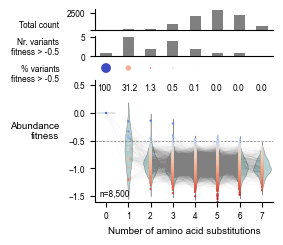

In [19]:
import seaborn as sns
import networkx as nx
from itertools import count
from seaborn import kdeplot
from itertools import groupby
import matplotlib
import numpy as np

validated_variants = {'P06241': ['FLFFVIV', 'MLFFIVL', 'MFFFVIL', 'MMFLIVF', 'LMFMLVF', 'LMVLLVL'],
                     'P01053': ['VIVVLVI', 'VIIIVVV', 'IIVIVVV', 'LMFIVVV', 'ILVIVIV'],
                     'P0A9X9': []}

protein_colors = {'P06241': '#B4D689',
                 'P01053': '#F6DCC9',
                 'P0A9X9': '#B1D9D8'}

total_core_viabilities = pd.DataFrame(columns=['protein', 'variants_above_01', 'variants_above_025', 'variants_above_05', 'variants_below_05'])
fraction_core_viabilities = pd.DataFrame(columns=['protein', 'variants_above_01', 'variants_above_025', 'variants_above_05', 'variants_below_05'])
for protein in ['P0A9X9']:
    
    protein_variants = allvariants.loc[allvariants['Protein']==protein].copy()

    # Normalize data in the -1 to 0 range
    reference=allvariants.loc[allvariants['Protein']==protein].sort_values(['Nham_aa','fitness'], ascending=[True,False]).iloc[0]['core']
    
    fig,ax = plt.subplots(figsize=(0,0))
    lines = kdeplot(data=protein_variants,x='fitness',linewidth=0).get_lines()
    for line in lines:
        x, y = line.get_data()
        mode=(x[np.argmax(y)])
        ax.axvline(x[np.argmax(y)], ls='--')
    plt.close()
        
    protein_variants_scaled = protein_variants.copy()    
    
    protein_variants_scaled['fitness']=normalize(list(protein_variants_scaled['fitness']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    protein_variants_scaled['fitness1_uncorr']=normalize(list(protein_variants_scaled['fitness1_uncorr']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness1_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    protein_variants_scaled['fitness2_uncorr']=normalize(list(protein_variants_scaled['fitness2_uncorr']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness2_uncorr'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})

    lowest_nham = int(protein_variants_scaled.loc[protein_variants_scaled['core']==reference].iloc[0]['Nham_aa'])

    lines = kdeplot(data=protein_variants_scaled, x='fitness', ax=ax).get_lines()
        
    for line in lines:
        x, y = line.get_data()
        mode=x[np.argmax(y)]
    
    G = nx.from_dict_of_lists(dod)
    G_val = nx.from_dict_of_lists(dod)
    
    pos={}
    for index, row in protein_variants_scaled.iterrows():
        pos[row.core] = (row.Nham_aa-lowest_nham, row.fitness)
        
    validated = validated_variants[protein]
    pos_val={}
    for index, row in protein_variants_scaled[protein_variants_scaled['core'].isin(validated)].iterrows():
        pos_val[row.core] = (row.Nham_aa-lowest_nham, row.fitness)

    fig, (ax0,axviable,ax1,ax2) = plt.subplots(4,1,gridspec_kw={'height_ratios':[2,2,1,12],'hspace': 0.15},figsize=(2.3,2.5))
    plt.close()
    fig, (ax0,axviable,ax1,ax2) = plt.subplots(4,1,gridspec_kw={'height_ratios':[2,2,1,12],'hspace': 0.15},figsize=(2.3,2.5),sharex=ax1)
    
    
    fig=sns.violinplot(x="Nham_aa", y="fitness", data=protein_variants_scaled, inner=None, ax=ax2, color=protein_colors[protein], linewidth=0.3)
    plt.axhline(y=-0.5, linestyle='--', color='gray', linewidth=0.5)
    
    remove=[i for i in dod.keys() if i not in pos.keys()]
    remove_val=[i for i in dod.keys() if i not in pos_val.keys()]
    
    G.remove_nodes_from(remove)
    G_val.remove_nodes_from(remove_val)
    
    fitness_values=[]
    for i in pos:
        fitness_values.append(pos[i][1])
    groups = []
    for _, g in groupby(fitness_values, lambda x: (x-1)//0.05):
        groups.append(list(g))      # Store group iterator as a list
    
    fitness_attr={}
    for node in G.nodes:
        iterator=0
        for bin in groups:
            if pos[node][1] in bin:
                fitness_attr[node]=iterator
                break
            iterator+=1
    
    nx.set_node_attributes(G, fitness_attr, 'fitness')
    groups = set(nx.get_node_attributes(G,'fitness').values())
    mapping = dict(zip(sorted(groups),count()))
    nodes = G.nodes()
    colors = [mapping[G.nodes[n]['fitness']] for n in nodes]
    
    total_viable=0
    nham_viability=pd.DataFrame(columns=['Number_of_variants','Fraction_50pc_folded'])
    for nham in range(lowest_nham,8,1):
        nham_viability.at[nham,'protein']=protein
        nham_viability.at[nham,'nham']=nham
        nham_viability.at[nham,'Number_of_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])
        nham_viability.at[nham,'Fraction_50pc_folded']=round(100*(len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.5].index)/len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])),1)
        nham_viability.at[nham,'Number_of_50pc_folded_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.5].index)
        nham_viability.at[nham,'Fraction_75pc_folded']=round(100*(len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.25].index)/len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])),1)
        nham_viability.at[nham,'Number_of_75pc_folded_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.25].index)
        nham_viability.at[nham,'Fraction_90pc_folded']=round(100*(len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.1].index)/len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham])),1)
        nham_viability.at[nham,'Number_of_90pc_folded_variants']=len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.1].index)
        total_viable=total_viable+len(protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']==nham].loc[protein_variants_scaled['fitness']>=-0.5].index)
    for index, row in nham_viability.iterrows():
        nham_viability.at[index,'Fraction_of_total_50pc_viable_variants']= round(100*row['Number_of_50pc_folded_variants']/total_viable,1)
    
    total_core_viabilities.at[protein,'variants_above_01']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.1].index)/len(protein_variants_scaled.index)*5**7
    total_core_viabilities.at[protein,'variants_above_025']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.25].index)/len(protein_variants_scaled.index)*5**7
    total_core_viabilities.at[protein,'variants_below_05']=5**7-len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.5].index)/len(protein_variants_scaled.index)*5**7
    total_core_viabilities.at[protein,'variants_above_05']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.5].index)/len(protein_variants_scaled.index)*5**7

    fraction_core_viabilities.at[protein,'variants_above_01']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.1].index)/len(protein_variants_scaled.index)
    fraction_core_viabilities.at[protein,'variants_above_025']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.25].index)/len(protein_variants_scaled.index)
    fraction_core_viabilities.at[protein,'variants_below_05']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']<=-0.5].index)/len(protein_variants_scaled.index)
    fraction_core_viabilities.at[protein,'variants_above_05']=len(protein_variants_scaled.loc[protein_variants_scaled['fitness']>=-0.5].index)/len(protein_variants_scaled.index)
        
    orig_cmap = plt.cm.coolwarm
    iterator_cmap+=1
    midpoint=(-0.5 - np.min(protein_variants_scaled['fitness']))/ (np.max(protein_variants_scaled['fitness']) - np.min(protein_variants_scaled['fitness']))
    shifted_cmap = shiftedColorMap(orig_cmap, midpoint=1-midpoint, name='shifted'+str(iterator_cmap))
        
    nx.draw_networkx(G, pos=pos, with_labels=False, node_size=0, ax=ax2, edge_color='gray', width=0.01)
    nodes=nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, node_size=0.3, cmap=shifted_cmap)
    nx.draw_networkx(G_val, pos=pos_val, with_labels=False, node_size=10, ax=ax2, width=0, node_shape=matplotlib.markers.MarkerStyle(marker='o', fillstyle='none'), node_color='k')
    ax2.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax2.set_xlabel('Number of amino acid substitutions', fontsize=7)
    ax2.set_ylabel("Abundance\nfitness", fontsize=7,rotation='horizontal', ha='right')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.tick_params(axis='both', which='major', labelsize=6)
    
    nham_viability['Fraction_50pc_folded'] = pd.to_numeric(nham_viability['Fraction_50pc_folded'], errors='coerce')
    sns.scatterplot(x=[i-lowest_nham for i in nham_viability['nham']],y=[0]*len(nham_viability.index), hue=nham_viability['Fraction_50pc_folded'].astype(float),palette='coolwarm_r', s=nham_viability['Fraction_50pc_folded']*0.5, legend=False,ax=ax1)
    ax1.spines[['top','right','left','bottom']].set_visible(False)
    ax1.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False,top=False, right=False)
    ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    for index, row in nham_viability.iterrows():
        if row.Fraction_50pc_folded == 100.0:
            ax2.annotate(100, (row.nham-lowest_nham-0.4,0.4), fontsize=6, color='black')
        else:
            ax2.annotate(row.Fraction_50pc_folded, (row.nham-lowest_nham-0.3,0.4), fontsize=6, color='black')
    ax1.set_ylabel('% variants\nfitness > -0.5',fontsize=6,rotation='horizontal', ha='right')
            
    ax2.annotate('n='+f"{len(protein_variants_scaled):,}", (-0.3,-1.5), fontsize=6)
    plt.subplots_adjust(hspace=0.05)
    
    nham_viability['Number_of_variants'].plot.bar(ax=ax0,fontsize=6,color='gray')
    ax0.spines[['top','right']].set_visible(False)
    ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax0.set_ylabel('Total count',fontsize=6, rotation='horizontal', ha='right')
    labels = ax0.get_yticklabels()
    labels[0] = ""
    ax0.set_yticklabels(labels)
    
    nham_viability['Number_of_50pc_folded_variants'].plot.bar(ax=axviable,fontsize=6,color='gray')
    axviable.spines[['top','right']].set_visible(False)
    axviable.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    axviable.set_ylabel('Nr. variants\nfitness > -0.5',fontsize=6,rotation='horizontal', ha='right')
    
    ax0.get_yaxis().set_label_coords(-0.2,0)
    axviable.get_yaxis().set_label_coords(-0.2,0)
    ax1.get_yaxis().set_label_coords(-0.2,-1)
    ax2.get_yaxis().set_label_coords(-0.2,0.5)
    plt.ylim(-1.6,0.6)
    plt.xlim(-0.5,7-lowest_nham+0.5)
    plt.rcParams['svg.fonttype'] = 'none'
#    plt.savefig(protein+'_fitness_distri.png', dpi=300, transparent=True, bbox_inches='tight')



## Panel H

In [20]:
def identify_mutations(dataframe, aa_seq_col, nham_aa_col):
    reference_row = dataframe[dataframe[nham_aa_col] == 0]
    if reference_row.empty:
        raise ValueError("No reference sequence found with Nham_aa = 0")
    reference_sequence = reference_row[aa_seq_col].iloc[0]

    def get_mutations(row):
        if row[nham_aa_col] == 0:
            return ""
        mutations = []
        for i, (ref_aa, mut_aa) in enumerate(zip(reference_sequence, row[aa_seq_col]), start=1):
            if ref_aa != mut_aa:
                mutations.append(f"{ref_aa}{i}{mut_aa}")
        return ",".join(mutations)

    dataframe['mutations'] = dataframe.apply(get_mutations, axis=1)
    return dataframe
protein_variants_scaled = identify_mutations(protein_variants_scaled, 'aa_seq', 'Nham_aa')
protein_variants_scaled.at[protein_variants_scaled.loc[allvariants['Nham_aa']==0].index[0],'mutations']='WT'

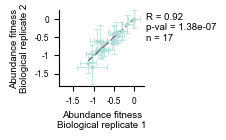

In [21]:
df = protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']<=1][['mutations','fitness1_uncorr','fitness2_uncorr', 'sigma1_uncorr', 'sigma2_uncorr']]
df.set_index('mutations', inplace=True)

g = sns.FacetGrid(data=df, aspect=2)
g.map(plt.errorbar, 'fitness1_uncorr', 'fitness2_uncorr', 'sigma1_uncorr','sigma2_uncorr', fmt='o', elinewidth=0.5, capsize=2, capthick=0.5, markersize=2, color='#B1D9D8')
#g.add_legend(bbox_to_anchor=(1.3,0.7), title='', fontsize=6)
g.fig.set_size_inches(1,1)
g.tick_params(axis='both', which='major', labelsize=6)

x = df[['fitness1_uncorr']].to_numpy()
y = df[['fitness2_uncorr']].to_numpy()


model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)
r,p = pearsonr(y.ravel(),y_pred.ravel())

plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
plt.xlabel('Abundance fitness\nBiological replicate 1', fontsize=7)
plt.ylabel('Abundance fitness\nBiological replicate 2', fontsize=7)
#plt.title('R = '+str(round(r,2)), fontsize=7,y=0.5, pad=0,loc='right')
plt.annotate('R = '+str(round(r,2))+'\np-val = '+'{:0.2e}'.format(p),xy=(0.3,-0.3),fontsize=7, annotation_clip=False)
plt.annotate('n = '+str(len(x)), xy=(0.3,-0.6),fontsize=7, annotation_clip=False)
plt.xticks([-1.5,-1,-0.5,0],[-1.5,-1,-0.5,0])
plt.xlim(-1.85,0.25)
plt.yticks([-1.5,-1,-0.5,0],[-1.5,-1,-0.5,0])
plt.ylim(-1.85,0.25)

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig(query_protein+'_WT_n_singles_bio_rep_correl.svg', dpi=300, transparent=True)

## Panel I

In [22]:
import pandas as pd
rocklin = pd.read_csv(path+'FigS1/Tsuboyama2023_Dataset2_Dataset3_20230416.csv',sep=',',low_memory=False)

In [23]:
from Bio.Seq import Seq
import math

P0A9X9 = 'ATGACTGGTATTGTCAAATGGTTTAATGCAGATAAAGGTTTTGGTTTTATCACTCCAGATGATGGTTCTAAAGATGTCTTTGTCCATTTTTCTGCAATTCAAAATGATGGTTATAAATCTTTGGATGAAGGTCAAAAAGTCTCTTTCACTATTGAATCTGGTGCAAAAGGTCCAGCAGCAGGTAATGTCACTTCT'

query_protein='P0A9X9'
pdb='1MJC'
DTS = ['F', 'L', 'I', 'V', 'M']

rocklin['scramble']=False
for index, row in rocklin[rocklin['name'].str.startswith(pdb)].iterrows():
    if len(row['name'].split('_'))>1:
        if row['name'].split('_')[1]=='scramble':
            rocklin.at[index,'scramble']=True

query_protein_wt = str(Seq(P0A9X9).translate())
rocklin_query_protein = rocklin[rocklin['name'].str.startswith(pdb)].loc[rocklin['scramble']!=True].copy()

fyn_wt = str(Seq(rocklin_query_protein.loc[rocklin_query_protein['name']==pdb+'.pdb'].iloc[0]['dna_seq']).translate())[4:-5]

def translate(sequence):
    variant = str(Seq(sequence).translate())
    if variant.find('SAGGSAG') > -1:
        variant = variant[8:-9]
    else:
        variant = variant[4:-5]
    return variant

def find_mutations(sequence, wt_seq):
    mutations = []
    for i, (wt_res, seq_res) in enumerate(zip(wt_seq, sequence), start=1):
        if wt_res != seq_res:
            mutations.append(f"{wt_res}{i}{seq_res}")
    return ",".join(mutations)

def hamming_distance(str1, str2):
    return sum(c1 != c2 for c1, c2 in zip(str1, str2))


rocklin_query_protein['aa_seq'] = rocklin_query_protein['dna_seq'].apply(lambda seq: translate(seq))
rocklin_query_protein['mutations'] = rocklin_query_protein['aa_seq'].apply(lambda seq: find_mutations(seq, fyn_wt))
rocklin_query_protein['Nham'] = rocklin_query_protein['aa_seq'].apply(lambda seq: hamming_distance(seq, fyn_wt))

rocklin_query_protein.at[index,'redundant_single']=False
for index, row in rocklin_query_protein.iterrows():
    if row.Nham==1 and len(row['name'].split('_'))>2:
        rocklin_query_protein.at[index,'redundant_single']=True

In [24]:
rocklin_query_protein.at[rocklin_query_protein.loc[rocklin_query_protein['name']=='1MJC.pdb'].index[0],'mutations']='WT'

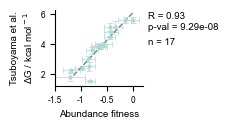

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from seaborn import kdeplot


df = protein_variants_scaled.loc[protein_variants_scaled['Nham_aa']<=10][['mutations','fitness','sigma']].merge(rocklin_query_protein.loc[rocklin_query_protein['Nham']<=10][['mutations','deltaG','deltaG_95CI']], left_on='mutations', right_on='mutations')
df.set_index('mutations', inplace=True)

g = sns.FacetGrid(data=df, aspect=2)
g.map(plt.errorbar, 'fitness', 'deltaG', 'deltaG_95CI','sigma', fmt='o', elinewidth=0.5, capsize=2, capthick=0.5, markersize=2, color='#B1D9D8')
#g.add_legend(bbox_to_anchor=(1.3,0.7), title='', fontsize=6)
g.fig.set_size_inches(1,1)
g.tick_params(axis='both', which='major', labelsize=6)

x = df[['fitness']].to_numpy()
y = df[['deltaG']].to_numpy()


model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y,y_pred)
r,p = pearsonr(y.ravel(),y_pred.ravel())

plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
plt.xlabel('Abundance fitness', fontsize=7)
plt.ylabel('Tsuboyama et al.\nΔG / kcal mol$^-$$^1$', fontsize=7)
#plt.title('R = '+str(round(r,2)), fontsize=7,y=0.5, pad=0,loc='right')
plt.annotate('R = '+str(round(r,2))+'\np-val = '+'{:0.2e}'.format(p),xy=(0.3,5),fontsize=7, annotation_clip=False)
plt.annotate('n = '+str(len(x)), xy=(0.3,4),fontsize=7, annotation_clip=False)
plt.xticks([-1.5,-1,-0.5,0],[-1.5,-1,-0.5,0])
plt.xlim(-1.5,0.2)

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig(query_protein+'_Tsuboyama.svg', dpi=300, transparent=True)